Web Economics Data Exploration
====================

Raluca Georgescu - March 2017


# Basic Statistics

Number of impressions, clicks, cost, CTR, avergae CPM and effective CPC.

In [4]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/train.csv")
df_valid = pd.read_csv("dataset/validation.csv")
df_test = pd.read_csv("dataset/test.csv")

In [5]:
df.bidprice.max()

300

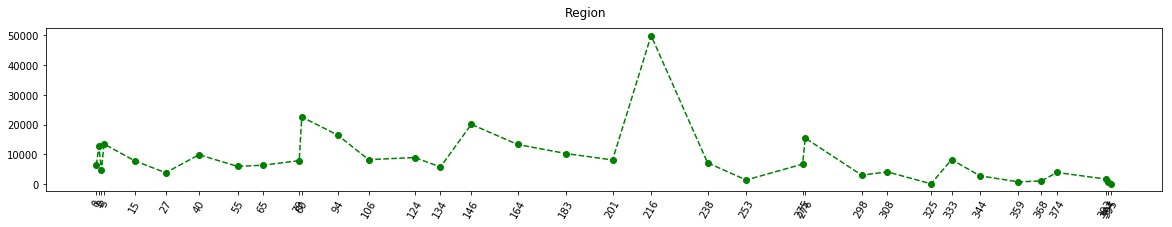

In [161]:
bids = df_test.groupby('region').bidid.count()
plt.plot(bids, 'g--o')
plt.xticks(df_test.region.unique(), rotation=60)
fig_size[0] = 20
fig_size[1] = 3
plt.rcParams['figure.figsize'] = fig_size
plt.suptitle('Region')
plt.show()

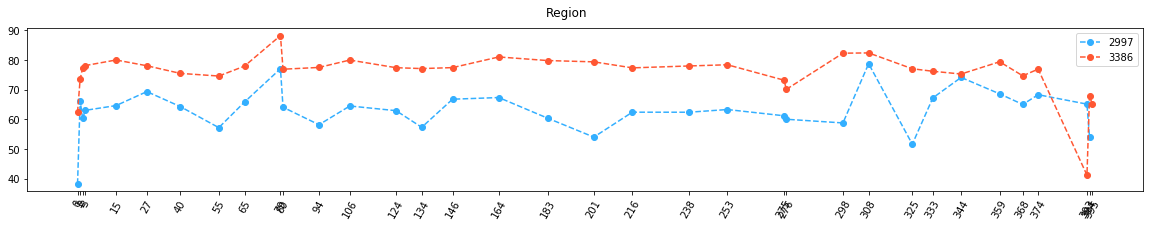

In [209]:
cond = df['advertiser'] == 2997
means = df[cond].groupby('region').payprice.mean()

cond2 = df['advertiser'] == 3386
means2 = df[cond2].groupby('region').payprice.mean()

line1, = plt.plot(means, color = '#33AFFF', ls ='--', marker = 'o', label='2997')
line2, = plt.plot(means2, color = '#FF5733' ,ls='--',  marker = 'o', label='3386')
plt.suptitle('Region')
plt.xticks(df.region.unique(), rotation=60)
fig_size[0] = 20
fig_size[1] = 3
plt.rcParams['figure.figsize'] = fig_size
plt.legend(handles=[line1, line2])
plt.show()

In [262]:
bids = df_test.groupby('city').bidid.count()
bids.sort_values(ascending=False)

city
219    13404
1      12661
217    11713
79      7893
275     6712
0       6369
277     6060
85      5806
233     4693
2       4607
334     4489
81      4052
184     3948
95      3906
165     3502
222     3273
148     2997
4       2878
82      2639
97      2536
96      2530
202     2521
147     2514
129     2431
239     2368
56      2216
41      2212
66      2072
125     2066
16      1959
       ...  
39        68
326       59
361       57
372       55
388       54
252       54
377       52
255       49
385       43
383       37
253       34
323       30
358       26
398       26
364       25
362       16
324       15
359       13
332        9
374        8
327        8
325        6
366        6
365        5
396        5
329        4
363        4
331        4
328        2
330        2
Name: bidid, dtype: int64

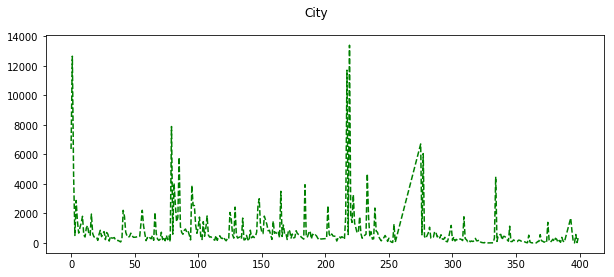

In [158]:
bids = df_test.groupby('city').bidid.count()
plt.plot(bids, 'g--')
plt.suptitle('City')
fig_size[0] = 9
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
plt.show()

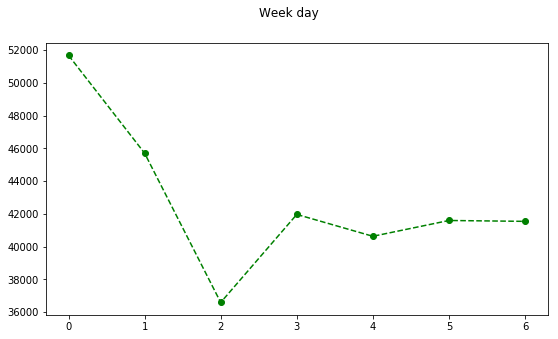

In [156]:
bids = df_test.groupby('weekday').bidid.count()
plt.plot(bids, 'g--o')
plt.suptitle('Week day')
fig_size[0] = 9
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
plt.show()

In [170]:
cond = df['advertiser'] == 2997
df[cond].groupby('weekday').payprice.mean()

weekday
2    56.456294
3    61.103254
4    67.134149
5    62.495288
Name: payprice, dtype: float64

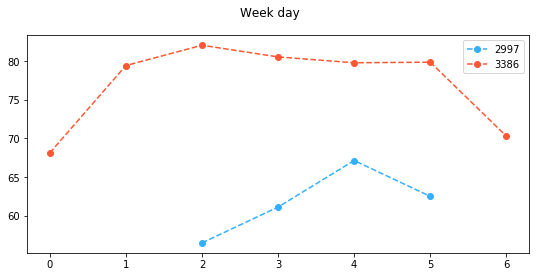

In [212]:
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

cond = df['advertiser'] == 2997
means = df[cond].groupby('weekday').payprice.mean()

cond2 = df['advertiser'] == 3386
means2 = df[cond2].groupby('weekday').payprice.mean()

line1, = plt.plot(means, color = '#33AFFF', ls ='--', marker = 'o', label='2997')
line2, = plt.plot(means2, color = '#FF5733' ,ls='--',  marker = 'o', label='3386')
plt.suptitle('Week day')
plt.xticks(df.weekday.unique())
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
plt.legend(handles=[line1, line2])
plt.show()

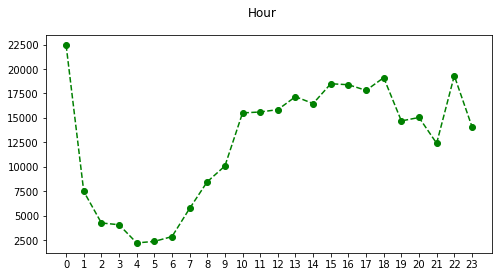

In [63]:
bids = df_test.groupby('hour').bidid.count()
plt.plot(bids, 'g--o')
plt.xticks(range(0,24))
plt.suptitle('Hour')
plt.show()

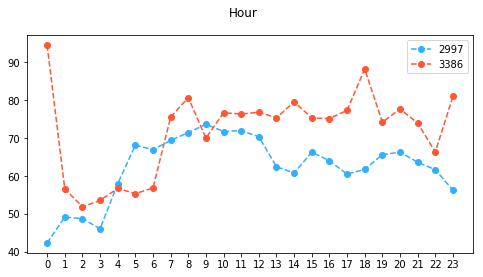

In [213]:
cond = df['advertiser'] == 2997
means = df[cond].groupby('hour').payprice.mean()

cond2 = df['advertiser'] == 3386
means2 = df[cond2].groupby('hour').payprice.mean()

line1, = plt.plot(means, color = '#33AFFF', ls ='--', marker = 'o', label='2997')
line2, = plt.plot(means2, color = '#FF5733' ,ls='--',  marker = 'o', label='3386')
plt.suptitle('Hour')
plt.xticks(df.hour.unique())
fig_size[0] = 9
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
plt.legend(handles=[line1, line2])
plt.show()

In [228]:
cond = df['advertiser'] == 2997
means = df[cond].groupby('adexchange').payprice.mean()

cond2 = df['advertiser'] == 3386
means2 = df[cond2].groupby('adexchange').payprice.mean()

line1, = plt.plot(means, color = '#33AFFF', ls ='--', marker = 'o', label='2997')
line2, = plt.plot(means2, color = '#FF5733' ,ls='--',  marker = 'o', label='3386')

plt.suptitle('Adexchange')

ad = pd.Series(means)
ad2 = pd.Series(means2)
labels = ad2.keys()
pltx1 = range(0,len(ad))

plt.xticks(pltx2, labels)

fig_size[0] = 9
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
plt.legend(handles=[line1, line2])
plt.show()

ValueError: could not convert string to float: 'null'

In [227]:
df[cond].groupby('adexchange').payprice.mean()

adexchange
null    62.642961
Name: payprice, dtype: float64

In [13]:
df_test.groupby('region').bidid.count()[:]

region
0       6369
1      12661
2       4607
3      13478
15      7808
27      3826
40      9874
55      5955
65      6352
79      7893
80     22569
94     16477
106     8218
124     8939
134     5740
146    20091
164    13328
183    10251
201     8125
216    49931
238     7141
253     1385
275     6712
276    15464
298     3014
308     4108
325       94
333     8245
344     2783
359      749
368     1061
374     3919
393     1687
394      803
395       92
Name: bidid, dtype: int64

In [19]:
df_test[:5]

,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,17,fe2e06dff1dfd227471fd1ca717888ac,1,u_VhkRLiMQL6dVJBn,windows_chrome,117.82.151.*,80,85,1,...,mm_10032134_3463115_11268126,300,250,1,1,0,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,null
1,5,22,92ea762b7b2cfd7aee30a2e88e1f5899,1,u_Vh12CnqyP9NOQhl,windows_chrome,123.126.88.*,1,1,3,...,News_F_Width1,1000,90,0,0,80,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10083,10110"
2,2,13,617dfab714eedf4988c4aa9ad5425eca,1,u_Vh1AOk5iPt5Vebb,windows_chrome,120.14.46.*,3,8,3,...,Ent_F_bottom_Width,1000,90,0,0,20,c46090c887c257b61ab1fa11baee91d8,0f951a030abdaedd733ee8d114ce2944,3427,"10063,10006,10111"
3,4,17,7fa016aaa3db39413b482f757facc3f4,1,u_Z0p2LRsmLqsNQIl,windows_ie,123.246.112.*,40,46,1,...,mm_10024662_3445902_11178345,336,280,2,1,0,ff5123fb9333ca095034c62fdaaf51aa,361e128affece850342293213691a043,3386,"10006,13776,10110"
4,6,20,49db062ac10d19591dc7d988d730aad5,1,u_Vhk0Vwm0Olu_kGz,windows_ie,123.134.53.*,146,151,3,...,News_F_bottom_Width,1000,90,0,0,31,0cd33fcb336655841d3e1441b915748d,c8758e8658b05bc3a88af7b37bdf0575,3476,"13403,10052,10075,10063,10006,10083,10031,10110"


# Bid Price Distribution

In [6]:
bids = df.groupby('advertiser')['bidprice'].mean()
bids

advertiser
1458    300.000000
2259    288.108872
2261    287.891394
2821    290.217945
2997    277.000000
3358    232.756800
3386    300.000000
3427    236.200118
3476    247.758609
Name: bidprice, dtype: float64

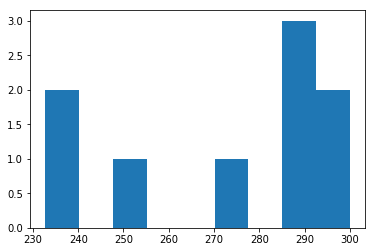

In [17]:
plt.hist(bids,9)
plt.show()

In [6]:
df['bidprice'].mean()

272.45817977876283

In [6]:
cond = df['click'] >0
ts1 = df.groupby('advertiser')['bidprice'].mean()
ts2 = df.groupby('advertiser')['bidprice'].max()
ts3 = df.groupby('advertiser')['bidprice'].min()
ts4 = df[cond].groupby('advertiser')['click'].count()
ts5 = df.groupby('advertiser')['click'].count()
ts6 = ts4.as_matrix()/ts5.as_matrix() * 100
ts7 = df.groupby('advertiser')['payprice'].sum()
ts8 = (ts7.as_matrix()*1000/ts5.as_matrix())/1000
ts9 = (ts7.as_matrix()/ts4.as_matrix())/1000
ts10 = df.groupby('advertiser')['payprice'].mean()
d = {'mean': ts1, 'max': ts2, 'min': ts3, 'clicks': ts4, 'impr': ts5, 'CTR %': ts6, 'cost' : ts7, 'CPM': ts8, 'eCPC': ts9, 'mean_cost': ts10}
df2 = pd.DataFrame(data=d)
df2

,CPM,CTR %,clicks,cost,eCPC,impr,max,mean,mean_cost,min
advertiser,,,,,,,,,,
1458,68.909349,0.083473,451,37231239,82.552636,540293,300,300.000000,68.909349,300
2259,92.990952,0.030659,45,13649026,303.311689,146778,294,288.108872,92.990952,277
2261,89.448196,0.030675,37,10789152,291.598703,120619,294,287.891394,89.448196,277
2821,89.128522,0.062226,144,20625766,143.234486,231416,294,290.217945,89.128522,277
2997,62.642961,0.460660,251,3413227,13.598514,54487,277,277.000000,62.642961,277
3358,92.345637,0.076448,233,28145288,120.795227,304782,241,232.756800,92.345637,227
3386,76.904464,0.071808,358,38341028,107.097844,498554,300,300.000000,76.904464,300
3427,81.096029,0.074885,340,36820111,108.294444,454031,241,236.200118,81.096029,227
3476,79.247824,0.050465,175,27481402,157.036583,346778,254,247.758609,79.247824,238


In [13]:
df2['CPM'].mean()

81.412659362083843

In [6]:
df2.to_latex()

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n{} &        CPM &     CTR \\% &  clicks &      cost &        eCPC &    impr &  max &        mean &  mean\\_cost &  min \\\\\nadvertiser &            &           &         &           &             &         &      &             &            &      \\\\\n\\midrule\n1458       &  68.909349 &  0.083473 &     451 &  37231239 &   82.552636 &  540293 &  300 &  300.000000 &  68.909349 &  300 \\\\\n2259       &  92.990952 &  0.030659 &      45 &  13649026 &  303.311689 &  146778 &  294 &  288.108872 &  92.990952 &  277 \\\\\n2261       &  89.448196 &  0.030675 &      37 &  10789152 &  291.598703 &  120619 &  294 &  287.891394 &  89.448196 &  277 \\\\\n2821       &  89.128522 &  0.062226 &     144 &  20625766 &  143.234486 &  231416 &  294 &  290.217945 &  89.128522 &  277 \\\\\n2997       &  62.642961 &  0.460660 &     251 &   3413227 &   13.598514 &   54487 &  277 &  277.000000 &  62.642961 &  277 \\\\\n3358       &  92.345637 &  0.076448 &     233 &

In [3]:
cond = df_valid['click'] >0
ts1 = df_valid.groupby('advertiser')['bidprice'].mean()
ts2 = df_valid.groupby('advertiser')['bidprice'].max()
ts3 = df_valid.groupby('advertiser')['bidprice'].min()
ts4 = df_valid[cond].groupby('advertiser')['click'].count()
ts5 = df_valid.groupby('advertiser')['click'].count()
ts6 = ts4.as_matrix()/ts5.as_matrix() * 100
ts7 = df_valid.groupby('advertiser')['payprice'].sum()
ts8 = (ts7.as_matrix()*1000/ts5.as_matrix())/1000
ts9 = (ts7.as_matrix()/ts4.as_matrix())/1000
ts10 = df_valid.groupby('advertiser')['payprice'].mean()
ts11 = ts2 == ts3
d_valid = {'mean': ts1, 'max': ts2, 'min': ts3, 'clicks': ts4, 'impr': ts5, 'CTR %': ts6, 'cost' : ts7, 'CPM': ts8, 'eCPC': ts9, 'mean_cost': ts10, 'const_bid': ts11}
df3 = pd.DataFrame(data=d_valid)
df3.sort_values('const_bid')
df3

,CPM,CTR %,clicks,const_bid,cost,eCPC,impr,max,mean,mean_cost,min
advertiser,,,,,,,,,,,
1458,68.957684,0.083299,50,True,4139185,82.783700,60025,300,300.000000,68.957684,300
2259,92.554784,0.066996,11,False,1519657,138.150636,16419,294,288.056885,92.554784,277
2261,89.472625,0.037397,5,False,1196249,239.249800,13370,294,287.923485,89.472625,277
2821,89.007959,0.062422,16,False,2281452,142.590750,25632,294,290.255384,89.007959,277
2997,64.200199,0.430892,26,True,387384,14.899385,6034,277,277.000000,64.200199,277
3358,92.335657,0.079757,27,False,3125839,115.771815,33853,241,232.696305,92.335657,227
3386,77.097362,0.059787,33,True,4255466,128.953515,55196,300,300.000000,77.097362,300
3427,80.931958,0.089319,45,False,4077433,90.609622,50381,241,236.187868,80.931958,227
3476,78.852519,0.033472,13,False,3062553,235.581000,38839,254,247.735627,78.852519,238


In [14]:
df3['CPM'].mean()

81.490083158835219

In [6]:
cond = df_valid['click'] >0
df_valid[cond]['click'].count()

226

In [15]:
ts5 = df_test.groupby('advertiser')['bidid'].count()
d_test = {'impr': ts5}
df4 = pd.DataFrame(data=d_test)
df4

,impr
advertiser,
1458,59789
2259,16276
2261,13499
2821,25628
2997,6181
3358,34038
3386,55559
3427,50149
3476,38630


In [8]:
cond =  df['click'] > 0
df[cond].payprice.mean()

106.68190757128811

## Validation Set

In [6]:
df_valid[:5]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,250,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111"
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,50,FirstView,Na,118,11908,277,118,null,2997,null
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,90,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null


In [181]:
len(df.usertag.unique())

814364

In [165]:
df.describe()

,click,weekday,hour,logtype,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.697738e+06,2.697738e+06,2.697738e+06,2697738.0,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06,2.697738e+06
mean,7.539650e-04,2.891155e+00,1.346598e+01,1.0,1.494494e+02,1.543936e+02,5.756453e+02,1.888990e+02,2.648484e+01,2.724582e+02,8.025102e+01,2.847232e+03
std,2.744807e-02,2.053776e+00,6.592290e+00,0.0,1.020496e+02,1.032899e+02,3.212459e+02,1.308906e+02,3.703962e+01,2.910801e+01,6.236699e+01,7.821371e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,1.0,7.900000e+01,7.900000e+01,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.0,1.460000e+02,1.520000e+02,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,7.000000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,1.0,2.160000e+02,2.220000e+02,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,1.010000e+02,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,1.0,3.950000e+02,3.990000e+02,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [143]:
impressions = df_valid.click.count()
cond = df_valid.click > 0
clicks = df_valid[cond].click.count()
CTR = clicks/impressions
CTR

0.00075396415000550463

In [138]:
df_valid[cond].groupby('advertiser')['click'].count()

advertiser
1458    50
2259    11
2261     5
2821    16
2997    26
3358    27
3386    33
3427    45
3476    13
Name: click, dtype: int64

## Operating System and Browsers

Preprocess user agent and split between OS and broswer

In [96]:
useragents = df.useragent.unique()
operating_systems = []
browsers = []
for useragent in useragents:
    useragent_data = re.split('_',useragent)
    operating_systems.append(useragent_data[0])    
    browsers.append(useragent_data[1])
browsers = set(browsers)
operating_systems = set(operating_systems)
browsers

{'chrome',
 'firefox',
 'ie',
 'maxthon',
 'opera',
 'other',
 'safari',
 'sogou',
 'theworld'}

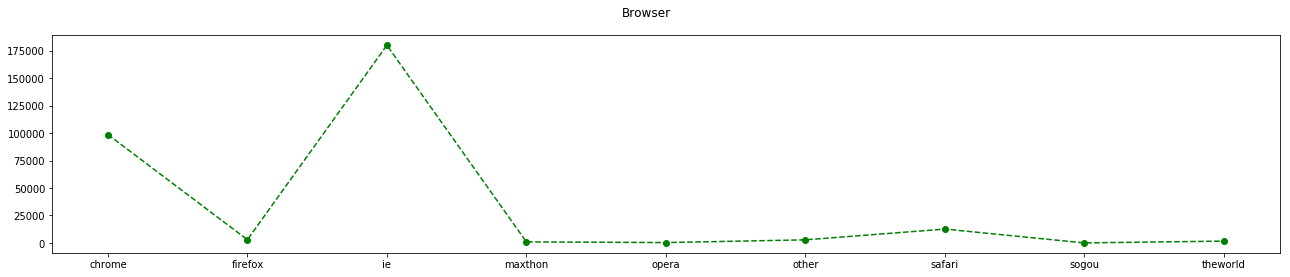

In [254]:
from collections import defaultdict
b_count = defaultdict(int)
useragents = df_test.useragent

for useragent in useragents:
    useragent_data = re.split('_',useragent)
    b_count[useragent_data[1]] += 1

brows = pd.Series(b_count)
labels = brows.keys()
pltx = [0,1,2,3,4,5,6,7,8]

plt.plot(pltx, brows.values, 'g--o')
plt.suptitle('Browser')
plt.xticks(pltx, labels)
plt.show()

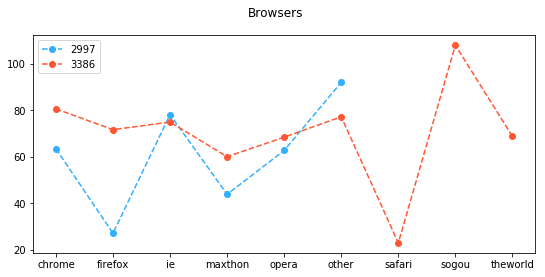

In [255]:
cond = df['advertiser'] == 2997
b_count = defaultdict(float)
pp = df[cond].groupby('useragent').payprice.mean()
useragents = df[cond].groupby('useragent').payprice.mean().keys()

cond2 = df['advertiser'] == 3386
b_count2 = defaultdict(float)
pp2 = df[cond2].groupby('useragent').payprice.mean()
useragents2 = df[cond2].groupby('useragent').payprice.mean().keys()

for useragent in useragents:
    useragent_data = re.split('_',useragent)
    b_count[useragent_data[1]] = pp[useragent]
    
for useragent in useragents2:
    useragent_data = re.split('_',useragent)
    b_count2[useragent_data[1]] = pp2[useragent]
    
brows = pd.Series(b_count)
brows2 = pd.Series(b_count2)
labels = brows2.keys()
pltx1 = [0,1,2,3,4,5]
pltx2 = [0,1,2,3,4,5,6,7,8]

fig_size[0] = 9
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size

line1, = plt.plot(pltx1, brows.values, color = '#33AFFF', ls ='--', marker = 'o', label='2997')
line2, = plt.plot(pltx2, brows2.values, color = '#FF5733' ,ls='--',  marker = 'o', label='3386')
plt.suptitle('Browsers')
plt.xticks(pltx2, labels)
plt.legend(handles=[line1, line2])
plt.show()

In [250]:
pp2 = df[cond2].groupby('useragent').payprice.mean()

pp2['windows_ie']

74.907003977724742

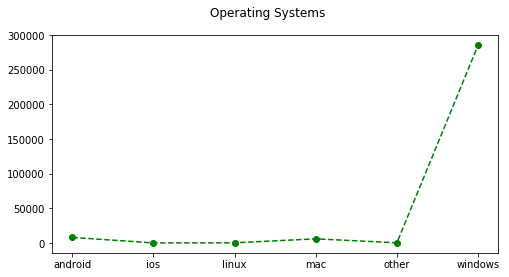

In [124]:
from collections import defaultdict
os_count = defaultdict(int)
useragents = df_test.useragent

for useragent in useragents:
    useragent_data = re.split('_',useragent)
    os_count[useragent_data[0]] += 1

oss = pd.Series(os_count)
labels = oss.keys()
pltx = [0,1,2,3,4,5]

plt.plot(pltx, oss.values, 'g--o')
plt.suptitle('Operating Systems')
plt.xticks(pltx, labels)
plt.show()

[ 92.          43.79487179  27.        ]
[ 105.610184     81.54117647   63.36842105  108.           73.46153846
   68.73308774]


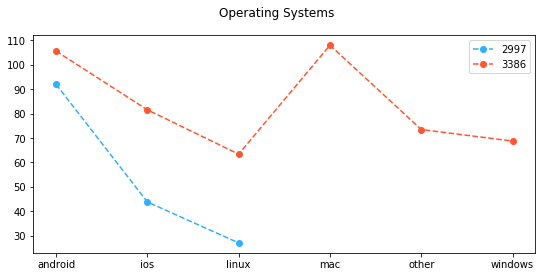

In [256]:
cond = df['advertiser'] == 2997
os_count = defaultdict(float)
pp = df[cond].groupby('useragent').payprice.mean()
useragents = df[cond].groupby('useragent').payprice.mean().keys()

cond2 = df['advertiser'] == 3386
os_count2 = defaultdict(float)
pp2 = df[cond2].groupby('useragent').payprice.mean()
useragents2 = df[cond2].groupby('useragent').payprice.mean().keys()

for useragent in useragents:
    useragent_data = re.split('_',useragent)
    os_count[useragent_data[0]] = pp[useragent]
    
for useragent in useragents2:
    useragent_data = re.split('_',useragent)
    os_count2[useragent_data[0]] = pp2[useragent]
    
oss = pd.Series(os_count)
oss2 = pd.Series(os_count2)
labels = oss2.keys()
pltx1 = [0,1,2]
pltx2 = [0,1,2,3,4,5]

print(oss.values)
print(oss2.values)

fig_size[0] = 9
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size

line1, = plt.plot(pltx1, oss.values, color = '#33AFFF', ls ='--', marker = 'o', label='2997')
line2, = plt.plot(pltx2, oss2.values, color = '#FF5733' ,ls='--',  marker = 'o', label='3386')
plt.suptitle('Operating Systems')
plt.xticks(pltx2, labels)
plt.legend(handles=[line1, line2])
plt.show()

In [125]:
oss

android      8002
ios            53
linux         223
mac          5933
other         218
windows    285320
dtype: int64

In [32]:
browsers_hot_enc = pd.get_dummies(list(browsers))
browsers_hot_enc

,chrome,firefox,ie,maxthon,opera,other,safari,sogou,theworld
0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0


In [31]:
os_hot_enc = pd.get_dummies(list(operating_systems))
os_hot_enc

,android,ios,linux,mac,other,windows
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,0,1,0,0,0


## Slot Prices
Buckets for the slot reserved price

In [107]:
slotprices = df.groupby('slotprice')['click'].count()

In [9]:
df.groupby('advertiser')['click'].count()

advertiser
1458    540293
2259    146778
2261    120619
2821    231416
2997     54487
3358    304782
3386    498554
3427    454031
3476    346778
Name: click, dtype: int64

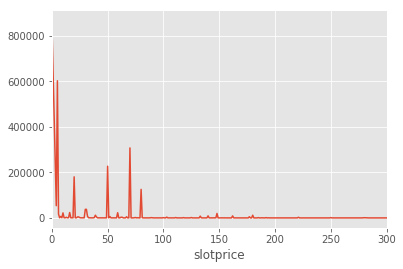

In [108]:
slotprices.plot()
plt.show()

## User tags 

In [5]:
usertags = df.usertag.unique()
usertags_grouped = df.groupby('advertiser')['usertag']
usertags[0]

'13866,10063'

Econding of user tags as one-hot vectors

In [6]:
tags = []
for usertag in usertags:
    usertag_data = re.split(',',usertag)
    for tag in usertag_data:
        tags.append(tag)
unique_usertags = set(tags)

unique_usertags = list(unique_usertags)
unique_usertags.remove('null')
unique_usertags.append('0')
unique_usertags = list(map(int, unique_usertags))
unique_usertags = np.array(unique_usertags)
unique_usertags

array([11379, 11724, 13678, 10093, 10684, 10147, 16617, 10114, 10142,
       10048, 11512, 10031, 13866, 13776, 11092, 10079, 10148, 11423,
       10140, 10111, 10075, 16661, 14273, 10130, 10059, 11278, 15398,
       10117, 10074, 10115, 13403, 10127, 11680, 11576, 10057, 10133,
       10067, 10129, 10123, 10118, 10076, 11944, 10131, 13874, 16751,
       10110, 13042, 13800, 13496, 10083, 10024, 10126, 10125, 10052,
       16706, 10138, 16753, 10077, 10120, 10145, 10116, 10102, 16593,
       10146, 10063, 11632, 10006, 10149,     0])

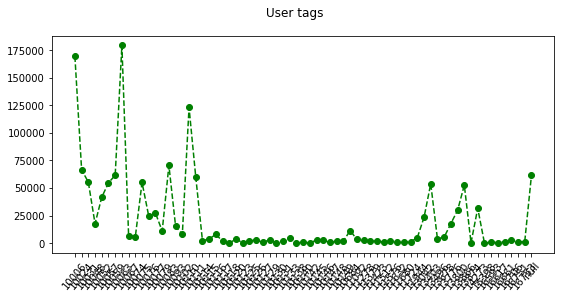

In [265]:
from collections import defaultdict
ut_count = defaultdict(int)
usertags = df_test.usertag

for usertag in usertags:
    usertag_data = re.split(',',usertag)
    for tag in usertag_data:
        ut_count[tag] += 1

ut = pd.Series(ut_count)
labels = ut.keys()
pltx = range(0,len(ut))

plt.plot(pltx, ut.values, 'g--o')
plt.suptitle('User tags')
plt.xticks(pltx, labels, rotation=50)
fig_size[0] = 22
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
plt.show()

In [266]:
ut.sort_values(ascending = False)

10063    179217
10006    169265
10110    122920
10083     70351
10024     66525
10059     61479
null      61375
10111     59955
10031     55207
10075     54990
10057     54634
13403     53722
13866     52539
10052     41549
14273     31569
13800     29729
10077     27213
10076     24381
13042     23300
13776     17711
10048     17612
10093     15216
10684     11386
10079     10930
10116      8002
10102      7863
10067      6632
10074      5736
13678      5399
11944      4969
          ...  
16706      2614
10146      2452
10114      2153
10125      2065
10149      1951
11423      1853
10148      1736
11576      1680
10131      1638
10117      1556
11379      1544
16753      1317
16661      1194
16751      1085
11724      1057
11680       987
11512       926
10127       759
16593       637
10147       560
11632       539
10140       539
16617       486
10138       419
10123       226
10142       209
13874       186
10130        71
10118        31
15398        14
dtype: int64

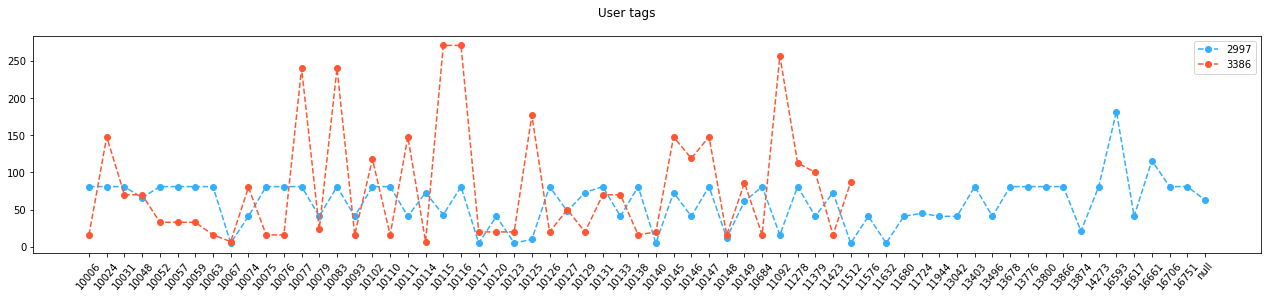

In [253]:
cond = df['advertiser'] == 2997
ut_count = defaultdict(float)
pp = df[cond].groupby('usertag').payprice.mean()
usertags = df[cond].groupby('usertag').payprice.mean().keys()

cond2 = df['advertiser'] == 3386
ut_count2 = defaultdict(float)
pp2 = df[cond2].groupby('usertag').payprice.mean()
usertags2 = df[cond2].groupby('usertag').payprice.mean().keys()

for usertag in usertags:
    usertag_data = re.split(',',usertag)
    for tag in usertag_data:
        ut_count[tag] = pp[usertag]
    
for usertag in usertags2:
    usertag_data = re.split(',',usertag)
    for tag in usertag_data:
        ut_count2[tag] = pp2[usertag]
    
ut = pd.Series(ut_count)
ut2 = pd.Series(ut_count2)
labels = ut.keys()
pltx1 = range(0,len(ut))
pltx2 = range(0,len(ut2))

line1, = plt.plot(pltx1, ut.values, color = '#33AFFF', ls ='--', marker = 'o', label='2997')
line2, = plt.plot(pltx2, ut2.values, color = '#FF5733' ,ls='--',  marker = 'o', label='3386')
plt.suptitle('User tags')
plt.xticks(pltx1, labels, rotation=50)
plt.legend(handles=[line1, line2])
fig_size[0] = 22
fig_size[1] = 4
plt.rcParams['figure.figsize'] = fig_size
plt.show()

In [ ]:
one_hot = pd.get_dummies(unique_usertags)
# usertags_onehot = one_hot.as_matrix()
one_hot[13403].values

In [ ]:
enc_usertags = np.empty(len(usertags))

for tag in usertags:
    usertag_data = re.split(',',tag)
    encoded = []
    for t in usertag_data:
        if t=='null':
            t = 0
        encoded = np.append(encoded,one_hot[int(t)].values)
    enc_usertags = np.append(enc_usertags,encoded)

len(enc_usertags)

In [111]:
len(enc_usertags)

814364

## Cities

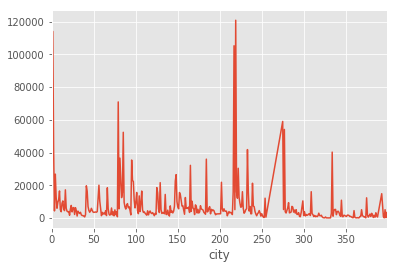

In [118]:
unique_cities = df.city.unique()
cities = df.groupby('city')['bidid'].count()
cities.plot()
plt.show()

In [120]:
# Top 10 cities 
cities.sort_values(ascending=False)[:10]

city
219    120875
1      114043
217    105272
79      70941
275     59012
0       56868
277     54113
85      52382
233     41807
2       41504
Name: bidid, dtype: int64

In [122]:
# Cities grouped by advertiser

df.groupby('advertiser')['city'].value_counts()

advertiser  city
1458        1       23389
            219     17638
            217     15196
            79      14300
            275     12359
            85      11204
            277     11072
            2        8875
            334      8500
            0        7844
            81       7300
            184      7147
            165      6901
            95       6732
            148      5996
            4        5982
            82       5353
            233      5158
            96       5030
            147      4903
            97       4574
            129      4554
            239      4422
            56       4402
            41       4243
            222      4195
            66       3986
            202      3971
            125      3807
            9        3801
                    ...  
3476        395        70
            326        65
            372        65
            255        61
            377        61
            388        61
            385      

In [10]:
df.groupby('advertiser')['bidprice'].mean()

advertiser
1458    300.000000
2259    288.108872
2261    287.891394
2821    290.217945
2997    277.000000
3358    232.756800
3386    300.000000
3427    236.200118
3476    247.758609
Name: bidprice, dtype: float64

In [11]:
df.groupby('advertiser')['payprice'].mean()

advertiser
1458    68.909349
2259    92.990952
2261    89.448196
2821    89.128522
2997    62.642961
3358    92.345637
3386    76.904464
3427    81.096029
3476    79.247824
Name: payprice, dtype: float64

In [12]:
cost = df.groupby('advertiser')['payprice'].sum()
cost

advertiser
1458    37231239
2259    13649026
2261    10789152
2821    20625766
2997     3413227
3358    28145288
3386    38341028
3427    36820111
3476    27481402
Name: payprice, dtype: int64

In [3]:
min_cost = df.groupby('advertiser')['payprice'].min()
max_cost = df.groupby('advertiser')['payprice'].max()
print(min_cost)
print(max_cost)

advertiser
1458    0
2259    1
2261    0
2821    1
2997    4
3358    1
3386    0
3427    0
3476    0
Name: payprice, dtype: int64
advertiser
1458    300
2259    294
2261    294
2821    294
2997    277
3358    267
3386    300
3427    267
3476    267
Name: payprice, dtype: int64


In [14]:
cond = df['click'] >0
clicks = df[cond].groupby('advertiser')['click'].count()
clicks

advertiser
1458    451
2259     45
2261     37
2821    144
2997    251
3358    233
3386    358
3427    340
3476    175
Name: click, dtype: int64

Number of impressions per adveriser

In [15]:
impressions = df.groupby('advertiser')['click'].count()
impressions

advertiser
1458    540293
2259    146778
2261    120619
2821    231416
2997     54487
3358    304782
3386    498554
3427    454031
3476    346778
Name: click, dtype: int64

In [16]:
impression_list = df.groupby('advertiser')['click'].count().tolist()
impression_list[0]

540293

In [17]:
CTR = clicks/impressions
CTR*100

advertiser
1458    0.083473
2259    0.030659
2261    0.030675
2821    0.062226
2997    0.460660
3358    0.076448
3386    0.071808
3427    0.074885
3476    0.050465
Name: click, dtype: float64

In [18]:
cost_per_impression = cost/impressions
CPM = cost_per_impression
CPM

advertiser
1458    68.909349
2259    92.990952
2261    89.448196
2821    89.128522
2997    62.642961
3358    92.345637
3386    76.904464
3427    81.096029
3476    79.247824
dtype: float64

List of unique adverisers

In [19]:
df.advertiser.unique()

array([1458, 3476, 3427, 3358, 2259, 2821, 3386, 2997, 2261])

Number of unique users in the data set is less than than the total number of entries/rows

In [20]:
len(df.userid.unique())

2591064

In [21]:
len(df.usertag.unique())

814364

In [22]:
df.usertag.unique()[:5]

array(['13866,10063', '10063,10111', '10063', '10077,10111',
       '10031,13042,10006,10057,13866,10063,14273,10052,10024,13403,10110'], dtype=object)

Number of unique IP addresses

In [23]:
len(df.IP.unique())

515530

Number of unique creatives

In [24]:
len(df.creative.unique())

130

In [39]:
cond = df['click'] >0
creatives = df[cond].groupby('creative')['click'].count()
creatives.sort_values(ascending=False)[:10]

creative
44966cc8da1ed40c95d59e863c8c75f0    171
11908                               155
832b91d59d0cb5731431653204a76c0e    128
48f2e9ba15708c0146bda5e1dd653caa    120
77819d3e0b3467fe5c7b16d68ad923a1     84
86c2543527c86a893d4d4f68810a0416     84
911b2d84826786018761e8c0b0a3a60c     76
449a22cd91d9042eda3d3a1b89a22ea8     72
c46090c887c257b61ab1fa11baee91d8     71
0cd33fcb336655841d3e1441b915748d     62
Name: click, dtype: int64

In [55]:
cond = df['click'] >0
advertisers = df[cond].groupby('advertiser')['click'].count()
advertisers.sort_values(ascending=False)

advertiser
1458    451
3386    358
3427    340
2997    251
3358    233
3476    175
2821    144
2259     45
2261     37
Name: click, dtype: int64

In [60]:
advertiser_cost = df.groupby('advertiser')['payprice'].sum()
advertiser_cost = advertiser_cost/1000
advertiser_cost

advertiser
1458    37231.239
2259    13649.026
2261    10789.152
2821    20625.766
2997     3413.227
3358    28145.288
3386    38341.028
3427    36820.111
3476    27481.402
Name: payprice, dtype: float64

In [62]:
eCPC = advertiser_cost/advertisers
eCPC

advertiser
1458     82.552636
2259    303.311689
2261    291.598703
2821    143.234486
2997     13.598514
3358    120.795227
3386    107.097844
3427    108.294444
3476    157.036583
dtype: float64

In [52]:
cond = df['creative'] == '44966cc8da1ed40c95d59e863c8c75f0'
campaign_cost = df[cond].payprice.sum()
campaign_cost = campaign_cost/1000

In [53]:
campaign_cost/171

96.376807017543868

In [36]:
cond = (df['creative'] == '44966cc8da1ed40c95d59e863c8c75f0') & (df['click'] > 0)
df[cond][:10]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
2406,1,0,18,b46c66e69709e97bad47216ab0df0eba,1,u_VhdCPAB9ONdcBBC,windows_ie,1.180.108.*,27,27,...,250,0,0,80,44966cc8da1ed40c95d59e863c8c75f0,300,90,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10006,10063,10031,13403,10059,10110"
30015,1,1,23,14f8212ec8a703074de556286710694e,1,u_Vhkx1JdnPc5CtMc,mac_safari,116.59.237.*,393,393,...,250,1,5,0,44966cc8da1ed40c95d59e863c8c75f0,300,177,361e128affece850342293213691a043,3386,null
30766,1,4,13,8d7885f168815747989e7697c4f03838,1,u_Vh5_PAFkL2F2jOc,android_safari,112.241.9.*,146,161,...,250,1,1,0,44966cc8da1ed40c95d59e863c8c75f0,300,112,361e128affece850342293213691a043,3386,null
43656,1,3,0,6cb5405a6d28cc94a79c8235e9d8dfa0,1,u_Vh5hZAppDeqOlsB,windows_chrome,122.79.104.*,164,178,...,250,0,1,0,44966cc8da1ed40c95d59e863c8c75f0,300,295,361e128affece850342293213691a043,3386,10063
77307,1,1,12,e63b5bd556524b4001ea9fceeeb3f10c,1,u_Vh1hOynxLZa9gWC,windows_ie,218.23.185.*,106,122,...,250,2,1,0,44966cc8da1ed40c95d59e863c8c75f0,300,277,361e128affece850342293213691a043,3386,"10024,10006,10110"
80724,1,4,15,400fafceb2228d86707fd66198b1a6ab,1,u_Vh1LO3urDo293mL,android_safari,117.136.35.*,80,85,...,250,1,5,0,44966cc8da1ed40c95d59e863c8c75f0,300,76,361e128affece850342293213691a043,3386,"11278,10024,13800"
99470,1,0,0,8241a00798afcb44c1c94dae2f7c5b5e,1,u_VhkRZisnOoLsGsj,windows_chrome,14.214.127.*,216,222,...,250,0,0,80,44966cc8da1ed40c95d59e863c8c75f0,300,80,43f4a37f42a7c5e6219e2601b26c6976,3386,null
124935,1,4,11,bbf27d910203f16e42604b5164bd92cb,1,u_Vh5_OaK2O8qOtWk,windows_ie,123.131.68.*,146,153,...,250,0,1,0,44966cc8da1ed40c95d59e863c8c75f0,300,191,361e128affece850342293213691a043,3386,"13866,10111"
145254,1,0,11,e94efa1cf6bbb5d8b51a68c976f315b9,1,u_Vhkr15mdP8B9MIb,windows_chrome,221.198.245.*,2,2,...,250,0,0,70,44966cc8da1ed40c95d59e863c8c75f0,300,70,43f4a37f42a7c5e6219e2601b26c6976,3386,13866
147208,1,6,21,745bbcd3807132eeef14d61ad59b6c58,1,u_Vhk71pqHPq1CjhE,mac_safari,113.213.88.*,55,56,...,250,0,0,10,44966cc8da1ed40c95d59e863c8c75f0,300,10,43f4a37f42a7c5e6219e2601b26c6976,3386,10075


Number of impressions logged in training dataset

In [25]:
df['click'].count()

2697738

Number of entries with clicks and with no clicks

In [26]:
df['click'].value_counts()

0    2695704
1       2034
Name: click, dtype: int64

In [27]:
df.groupby('advertiser')['click'].mean()

advertiser
1458    0.000835
2259    0.000307
2261    0.000307
2821    0.000622
2997    0.004607
3358    0.000764
3386    0.000718
3427    0.000749
3476    0.000505
Name: click, dtype: float64